In [1]:
import pandas as pd
import numpy as np
import random
import re
import nltk
from pprint import pprint
from nltk.corpus import stopwords
from nltk import word_tokenize
import pymorphy3
from string import punctuation
from string import digits
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pymystem3 import Mystem
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
import time, psutil, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from gensim.models import KeyedVectors
russian_stopwords = stopwords.words("russian")

In [2]:
new_words=('фото', 'splash', 'news/all', 'over', 'press', 'globallookpress', 'photographer')

In [3]:
random.seed(2020)

In [4]:
df = pd.read_csv('sport_and_nauka_and_showbiz_full_dataset_1095_shuffle_new.csv')

In [5]:
df

,URL,Text,Title,Class
0,https://7days.ru/news/ego-razvedut-na-bablo-bi...,"Диме Билану декабре исполнится 40 лет, он до с...",«Его разведут на бабло»: Билана после свадьбы ...,ШОУ-БИЗНЕС СЛУХИ
1,https://argumenti.ru/showbiz/2020/04/660300,Известная актриса Светлана Ходченкова поделила...,Ходченкова покорила поклонников в элегантном н...,ШОУ-БИЗНЕС
2,https://7days.ru/news/brosil-zhenu-kutsenko-po...,Гоша Куценко накануне посетил премьеру фильма ...,Бросил жену? Куценко появился на публике с бер...,ШОУ-БИЗНЕС СЛУХИ
3,https://7days.ru/news/o-sostoyanii-docheri-uit...,"Дочь Уитни Хьюстон, Бобби Кристина Браун была ...",О состоянии дочери Уитни Хьюстон поступают про...,ШОУ-БИЗНЕС СЛУХИ
4,https://argumenti.ru/science/2017/01/518254,"Важное открытие сделали ученые, представляющие...","Ученые рассказали, когда человек начинает стареть",НАУКА СЛУХИ
...,...,...,...,...
6565,https://7days.ru/news/zakon-on-ne-narushal-pri...,Даня Милохин около недели назад предпринял поп...,«Закон он не нарушал»: приемный отец рассказал...,ШОУ-БИЗНЕС СЛУХИ
6566,https://argumenti.ru/science/2016/08/463230,Позитивный настрой просто хорошее настроение ч...,Позитивный подход усиливает эффективность спор...,НАУКА СЛУХИ
6567,https://argumenti.ru/science/2019/12/643864,Ученые из Гронингенского университета провели ...,Ученые предрекли Европе сильное похолодание в ...,НАУКА СЛУХИ
6568,https://www.sports.ru/football/1110514050-rubi...,Защитник Монтассар Тальби покинул «Рубин» прод...,«Рубин» продал Тальби «Лорьяну». Защитник сбор...,СПОРТ


In [6]:
encoder = LabelEncoder()

In [7]:
df['ClassEncoded'] = encoder.fit_transform(df['Class'])

In [8]:
df['Text'] = df['Text'].str.slice(0,1350)

In [9]:
df['Text'] = df['Text'].apply(lambda x: ' '.join(x.split(' ')[:-1]))

In [10]:
morph = pymorphy3.MorphAnalyzer()

In [11]:
def process(text):
    return list(t.lower() for t in nltk.word_tokenize(text) if t.lower() not in new_words)

In [12]:
data = [process(t) for t in df['Text'][:]]

In [13]:
data[0]

['диме',
 'билану',
 'декабре',
 'исполнится',
 '40',
 'лет',
 ',',
 'он',
 'до',
 'сих',
 'пор',
 'ни',
 'разу',
 'не',
 'был',
 'женат',
 '.',
 'сначала',
 'ему',
 'было',
 'не',
 'до',
 'этого',
 'певец',
 'строил',
 'карьеру',
 'был',
 'сосредоточен',
 'на',
 'работе',
 '.',
 'сейчас',
 'же',
 'жизни',
 'артиста',
 ',',
 'как',
 'говорят',
 ',',
 'многое',
 'изменилось',
 '.',
 'он',
 'якобы',
 'живет',
 'некой',
 'аленой',
 'усачевой',
 ',',
 'одной',
 'из',
 'его',
 'фанаток',
 '.',
 'говорят',
 ',',
 'что',
 'билан',
 'даже',
 'собирается',
 'сделать',
 'ей',
 'предложение',
 ',',
 'однако',
 'против',
 'свадьбы',
 'выступает',
 'яна',
 'рудковская',
 '.',
 'светская',
 'львица',
 'считает',
 ',',
 'что',
 'женитьба',
 'может',
 'негативно',
 'сказать',
 'на',
 'творческих',
 'успехах',
 'билана',
 '.',
 'кроме',
 'того',
 ',',
 'она',
 'подозревает',
 ',',
 'что',
 'певца',
 'могут',
 'использовать',
 '.',
 'не',
 'секрет',
 ',',
 'что',
 'дима',
 'богатый',
 'человек',
 'его',

In [14]:
def lemmatizer(texts):
    return [[morph.parse(word)[0] for word in text] for text in texts]

In [15]:
morph_data = lemmatizer(data)

In [16]:
morph_data[0]

[Parse(word='диме', tag=OpencorporaTag('NOUN,anim,masc,Name sing,datv'), normal_form='дима', score=0.4, methods_stack=((DictionaryAnalyzer(), 'диме', 631, 2),)),
 Parse(word='билану', tag=OpencorporaTag('NOUN,anim,masc,Name sing,datv'), normal_form='билан', score=1.0, methods_stack=((DictionaryAnalyzer(), 'билану', 27, 2),)),
 Parse(word='декабре', tag=OpencorporaTag('NOUN,inan,masc sing,loct'), normal_form='декабрь', score=1.0, methods_stack=((DictionaryAnalyzer(), 'декабре', 195, 5),)),
 Parse(word='исполнится', tag=OpencorporaTag('VERB,perf,intr sing,3per,futr,indc'), normal_form='исполниться', score=1.0, methods_stack=((DictionaryAnalyzer(), 'исполнится', 652, 9),)),
 Parse(word='40', tag=OpencorporaTag('NUMB,intg'), normal_form='40', score=1.0, methods_stack=((NumberAnalyzer(score=0.9), '40'),)),
 Parse(word='лет', tag=OpencorporaTag('NOUN,inan,masc plur,gent'), normal_form='год', score=0.998492, methods_stack=((DictionaryAnalyzer(), 'лет', 1221, 11),)),
 Parse(word=',', tag=Openc

In [17]:
def extract_lemma(texts):
    norm = []
    for t in texts:
        res = []
        for word in t:
            n = word.normal_form
            res.append(n)
        norm.append(res)
    return norm

In [18]:
data_norm = extract_lemma(morph_data)

In [19]:
data_norm[0]

['дима',
 'билан',
 'декабрь',
 'исполниться',
 '40',
 'год',
 ',',
 'он',
 'до',
 'сей',
 'пора',
 'ни',
 'раз',
 'не',
 'быть',
 'женатый',
 '.',
 'сначала',
 'он',
 'быть',
 'не',
 'до',
 'это',
 'певец',
 'строить',
 'карьера',
 'быть',
 'сосредоточить',
 'на',
 'работа',
 '.',
 'сейчас',
 'же',
 'жизнь',
 'артист',
 ',',
 'как',
 'говорить',
 ',',
 'многое',
 'измениться',
 '.',
 'он',
 'якобы',
 'жить',
 'некий',
 'алёна',
 'усачёв',
 ',',
 'один',
 'из',
 'он',
 'фанатка',
 '.',
 'говорить',
 ',',
 'что',
 'билан',
 'даже',
 'собираться',
 'сделать',
 'она',
 'предложение',
 ',',
 'однако',
 'против',
 'свадьба',
 'выступать',
 'ян',
 'рудковский',
 '.',
 'светский',
 'львица',
 'считать',
 ',',
 'что',
 'женитьба',
 'мочь',
 'негативно',
 'сказать',
 'на',
 'творческий',
 'успех',
 'билан',
 '.',
 'кроме',
 'тот',
 ',',
 'она',
 'подозревать',
 ',',
 'что',
 'певец',
 'мочь',
 'использовать',
 '.',
 'не',
 'секрет',
 ',',
 'что',
 'дима',
 'богатый',
 'человек',
 'он',
 'деньга

In [20]:
data_norm = [w for w in data_norm if not w in new_words]

In [21]:
data_norm[0]

['дима',
 'билан',
 'декабрь',
 'исполниться',
 '40',
 'год',
 ',',
 'он',
 'до',
 'сей',
 'пора',
 'ни',
 'раз',
 'не',
 'быть',
 'женатый',
 '.',
 'сначала',
 'он',
 'быть',
 'не',
 'до',
 'это',
 'певец',
 'строить',
 'карьера',
 'быть',
 'сосредоточить',
 'на',
 'работа',
 '.',
 'сейчас',
 'же',
 'жизнь',
 'артист',
 ',',
 'как',
 'говорить',
 ',',
 'многое',
 'измениться',
 '.',
 'он',
 'якобы',
 'жить',
 'некий',
 'алёна',
 'усачёв',
 ',',
 'один',
 'из',
 'он',
 'фанатка',
 '.',
 'говорить',
 ',',
 'что',
 'билан',
 'даже',
 'собираться',
 'сделать',
 'она',
 'предложение',
 ',',
 'однако',
 'против',
 'свадьба',
 'выступать',
 'ян',
 'рудковский',
 '.',
 'светский',
 'львица',
 'считать',
 ',',
 'что',
 'женитьба',
 'мочь',
 'негативно',
 'сказать',
 'на',
 'творческий',
 'успех',
 'билан',
 '.',
 'кроме',
 'тот',
 ',',
 'она',
 'подозревать',
 ',',
 'что',
 'певец',
 'мочь',
 'использовать',
 '.',
 'не',
 'секрет',
 ',',
 'что',
 'дима',
 'богатый',
 'человек',
 'он',
 'деньга

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_norm, df['ClassEncoded'], random_state = 2020, test_size = 0.2)

In [23]:
#ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes=6, dtype = 'int32')
#ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes=6, dtype = 'int32')

In [24]:
#X_train = [str (item) for item in X_train]

In [25]:
#X_test = [str (item) for item in X_test]

In [26]:
#TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
#X_train_tfidf = TfidfVec.fit_transform(X_train)
#X_test_tfidf = TfidfVec.transform(X_test)

In [27]:
le = LabelEncoder()
y_train_number = le.fit_transform(y_train)
y_test_number = le.fit_transform(y_test)

In [28]:
y_train_number

array([1, 4, 5, ..., 0, 0, 5], dtype=int64)

In [29]:
dict_train = {'tokens': X_train, 'label': y_train_number} 

In [30]:
data_train = pd.DataFrame(dict_train)

In [31]:
dict_test = {'tokens': X_test, 'label': y_test_number} 

In [32]:
data_test = pd.DataFrame(dict_test)

In [33]:
#import zipfile
#import wget
#model_url = 'http://vectors.nlpl.eu/repository/11/184.zip'
#m = wget.download(model_url)
#model_file = model_url.split('/')[-1]
#with zipfile.ZipFile(model_file, 'r') as archive:
#    stream = archive.open('model.bin')
#    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

In [34]:
word2vec = KeyedVectors.load_word2vec_format("word2veccbow100_window2")

In [35]:
words = ['день', 'ночь', 'человек', 'семантика', 'студент']

# играем со словами
for word in words:
    # есть ли слово в модели? Может быть, и нет
    if word in word2vec:
        print(word)
        # смотрим на вектор слова (его размерность 1000, смотрим на первые 10 чисел)
        print(word2vec[word][:10])
        # выдаем 10 ближайших соседей слова:
        for i in word2vec.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
        print('\n')
    else:
        # Увы!
        print(word + 'is not present in the model')

день
[-0.44794306 -2.4737568  -0.58021563 -1.3493812   0.12299253  1.5216435
 -0.70049995 -2.3556643  -0.7040608  -0.37048987]
месяц 0.48991116881370544
неделя 0.4627082049846649
год 0.42665818333625793
время 0.3791466951370239
раз 0.35151436924934387
юбилей 0.33078303933143616
праздник 0.324370801448822
концерт 0.3223603367805481
мальдивы 0.31334763765335083
ребёнок 0.3094485402107239


ночь
[ 1.3335239  -0.54849815 -0.4170367  -0.45223424  0.9857434   1.0908401
 -1.7985839  -0.24548078  0.2124271   0.5409981 ]
вечер 0.35555484890937805
сутки 0.34402698278427124
праздник 0.27535879611968994
яхта 0.2685140073299408
день 0.25870317220687866
прогулка 0.2544514238834381
минута 0.24017006158828735
ведать 0.2393302172422409
игра 0.23919421434402466
полчаса 0.2390606701374054


человек
[ 0.22166412 -0.88145125  0.5786979   1.3625395  -0.80032223  1.8584524
 -0.30872184  0.3891603  -0.3545088   2.1317358 ]
женщина 0.4766367971897125
они 0.39405184984207153
она 0.37649136781692505
испытуемый 0

In [36]:
print(word2vec.similarity('день', 'ночь'))

0.2587032


In [37]:
print(word2vec.similarity('утро', 'вечер'))

0.17335446


In [38]:
def get_average_word2vec(tokens_list, vector, generate_missing = False, k = 300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis = 0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    return list(embeddings)
'''
def plot_embedding(X, y):
    truncated_SVD = TruncatedSVD(n_components = 2)
    truncated_SVD.fit(X)
    scores = truncated_SVD.transform(X)
    color_mapper = {label:idx for idx, label in enumerate(set(y))}
    color_column = [color_mapper[label] for label in y]
    colors = ['red', 'blue', 'green', 'black', 'yellow', 'orange']
        
    plt.scatter(scores[:, 0], scores[:, 1], s = 8, alpha = 0.8, c = y, cmap = matplotlib.colors.ListedColormap(colors))
    red_patch = mpatches.Patch(color = 'red', label = 'Nauka')
    blue_patch = mpatches.Patch(color = 'blue', label = 'NaukaSluhi')
    green_patch = mpatches.Patch(color = 'green', label = 'Politica')
    black_patch = mpatches.Patch(color = 'black', label = 'PoliticaSluhi')
    yellow_patch = mpatches.Patch(color = 'yellow', label = 'Sport')
    orange_patch = mpatches.Patch(color = 'orange', label = 'SportSluhi')
    plt.legend(handles = [red_patch, blue_patch, green_patch, black_patch, yellow_patch, orange_patch], prop = {"size": 12})
'''

'\ndef plot_embedding(X, y):\n    truncated_SVD = TruncatedSVD(n_components = 2)\n    truncated_SVD.fit(X)\n    scores = truncated_SVD.transform(X)\n    color_mapper = {label:idx for idx, label in enumerate(set(y))}\n    color_column = [color_mapper[label] for label in y]\n    colors = [\'red\', \'blue\', \'green\', \'black\', \'yellow\', \'orange\']\n        \n    plt.scatter(scores[:, 0], scores[:, 1], s = 8, alpha = 0.8, c = y, cmap = matplotlib.colors.ListedColormap(colors))\n    red_patch = mpatches.Patch(color = \'red\', label = \'Nauka\')\n    blue_patch = mpatches.Patch(color = \'blue\', label = \'NaukaSluhi\')\n    green_patch = mpatches.Patch(color = \'green\', label = \'Politica\')\n    black_patch = mpatches.Patch(color = \'black\', label = \'PoliticaSluhi\')\n    yellow_patch = mpatches.Patch(color = \'yellow\', label = \'Sport\')\n    orange_patch = mpatches.Patch(color = \'orange\', label = \'SportSluhi\')\n    plt.legend(handles = [red_patch, blue_patch, green_patch, bl

In [39]:
X_train_embed = get_word2vec_embeddings(word2vec, data_train['tokens'])
X_test_embed = get_word2vec_embeddings(word2vec, data_test['tokens'])

#fig = plt.figure(figsize = (8, 7))          
#plot_embedding(X_train_embed, y_train_number)
#plt.show()

In [40]:
X_train_w2v = scipy.sparse.csr_matrix(X_train_embed)
X_test_w2v = scipy.sparse.csr_matrix(X_test_embed)

In [41]:
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

In [42]:
def score(X_train, y_train, X_test, y_test, names = names, models = models):
    score_df, score_train, score_test = pd.DataFrame(), [], []
    x = time.time()
    best_score_w2v, best_model_w2v = 0, 0
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_test_pred = model.predict(X_train), model.predict(X_test)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_test.append(accuracy_score(y_test, y_test_pred))
        if accuracy_score(y_test, y_test_pred) > best_score_w2v:
            best_score_w2v = accuracy_score(y_test, y_test_pred)
            best_model_w2v = model
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Test accuracy"] = names, score_train, score_test
    score_df.sort_values(by = 'Test accuracy', ascending = False, inplace = True)
    return score_df, best_score_w2v, best_model_w2v

In [43]:
score_df, best_score_w2v, best_model_w2v = score(X_train_w2v, y_train_number, X_test_w2v, y_test_number, names = names, models = models)

In [44]:
score_df

,Classifier,Training accuracy,Test accuracy
0,Logistic Regression,0.842656,0.799848
3,Linear SVM,0.851218,0.796804
6,Ridge Classifier,0.819635,0.783866
5,SGD Classifier,0.844178,0.780822
7,XGBoost,0.999049,0.777778
4,Random Forest,0.999049,0.757991
1,KNN Classifier,0.748668,0.742009
2,Decision Tree,0.999049,0.652968
8,AdaBoost,0.511986,0.463470


In [45]:
def conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16):
    class_names = [0, 1, 2, 3, 4, 5] 
    tick_marks_y = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
    tick_marks_x = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, range(6), range(6))
    plt.figure(figsize = figsize)
    sns.set(font_scale = font_scale)
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {"size": annot_kws_size}, fmt = 'd')
    plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
    plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.show()

In [46]:
best_model, X_train_vec, X_test_vec = best_model_w2v, X_train_w2v, X_test_w2v

Test accuracy    0.799848
 


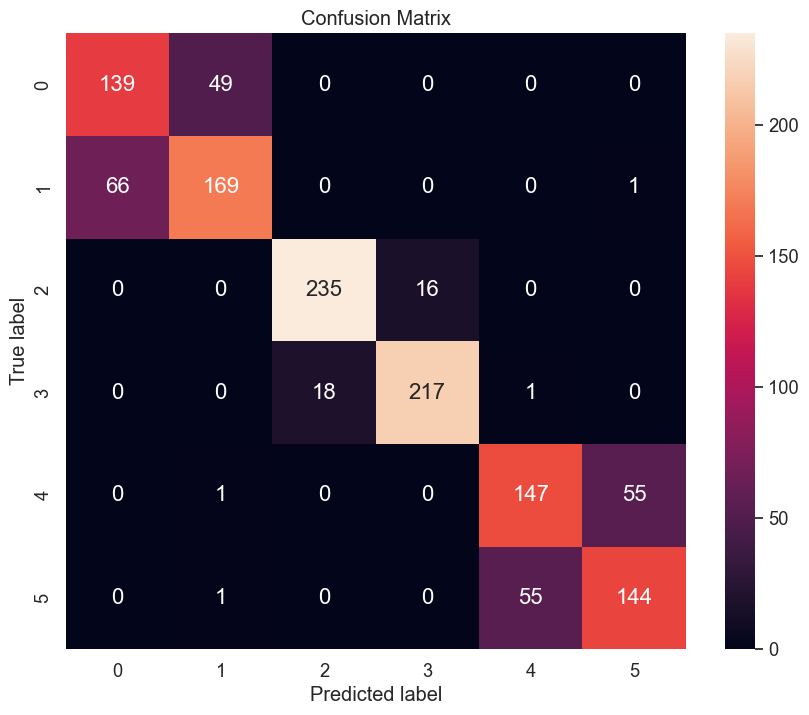

In [47]:
best_model.fit(X_train_vec, y_train_number)
y_test_pred = best_model.predict(X_test_vec)
score_test = accuracy_score(y_test_number, y_test_pred)
print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")
conf_mat(y_test_number, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16)

In [48]:
words = list(word2vec.index_to_key)

In [49]:
len(words)

9413

In [50]:
len(y_train_number)

5256

In [51]:
len(y_test_number)

1314